Работа № 7
Факторный анализ

In [ ]:
!pip install factor_analyzer

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.datasets import fetch_california_housing
from factor_analyzer.factor_analyzer import calculate_kmo

In [4]:
data = fetch_california_housing()

In [5]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y = pd.Series(data.target)
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64

In [19]:
df = X.assign(target=y.values)

kmo_per_variable,kmo_total=calculate_kmo(df)
kmo_total

0.39657382777713973

Значение критерия КМО < 0.6 считается недостаточным для дальнейшей уменьшения размерности без потери точности.

https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#:~:text=Calculate%20the%20Kaiser%2DMeyer%2DOlkin%20criterion%20for%20items%20and%20overall.

In [22]:
fa = FactorAnalyzer()
fa.fit(X)
original_eigen_values, common_factor_eigen_values = fa.get_eigenvalues()

original_eigen_values

array([2.02694942, 1.88129959, 1.27109076, 1.03103768, 1.0030556 ,
       0.65938003, 0.08160178, 0.04558513])

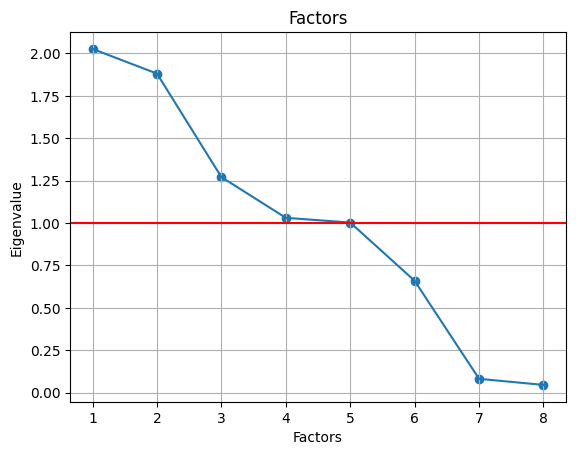

In [23]:
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.axhline(y=1, c='r')
plt.title('Factors')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Берем 4 фактора для дальнейшего анализа

In [26]:
fa = FactorAnalyzer()
fa.set_params(n_factors=4)

fa.fit(X)
loadings = np.abs(fa.loadings_).tolist()
for load, feature in zip(loadings, X.columns):
    load.append(feature)

cols = [f'Factor {i + 1}' for i in range(4)]
cols.append('Feature')

load_df = pd.DataFrame(loadings, columns=cols)
load_df.head()

,Factor 1,Factor 2,Factor 3,Factor 4,Feature
0,0.229893,0.015429,1.039518,0.155954,MedInc
1,0.219038,0.114632,0.003228,0.992114,HouseAge
2,1.014573,0.006926,0.254691,0.045085,AveRooms
3,0.901785,0.045209,0.144658,0.072520,AveBedrms
4,0.040741,0.043252,0.026223,0.322524,Population


In [28]:
variance, proportional_variance, cumulative_variances = fa.get_factor_variance()

In [35]:
print("The factor variances:")
for i in range(4):
  print(f"Factor {i+1}: {variance[i]}")

print("")

print("The proportional factor variances:")
for i in range(4):
  print(f"Factor {i+1}: {proportional_variance[i]}")

print("")

print("The cumulative factor variances:")
for i in range(4):
  print(f"Factor {i+1}: {cumulative_variances[i]}")

The factor variances:
Factor 1: 1.9495568775160872
Factor 2: 1.8907354786205728
Factor 3: 1.1739851059958601
Factor 4: 1.1278624147602063

The proportional factor variances:
Factor 1: 0.2436946096895109
Factor 2: 0.2363419348275716
Factor 3: 0.14674813824948252
Factor 4: 0.1409828018450258

The cumulative factor variances:
Factor 1: 0.2436946096895109
Factor 2: 0.4800365445170825
Factor 3: 0.6267846827665651
Factor 4: 0.7677674846115908


Результаты факторного анализа показали, что уменьшение размерности существенно снижает информативность, а значит и потенциальную точность предиктивных моделей.

Данный метод не подходит для датасета.